# shot_mapping.ipynb
Visualizing XG with heatmaps, using a starting point from [The Commute Sports](https://thecommutesports.com/2022/08/06/creating-nhl-shot-maps-with-python/)

In [54]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# TODO: Update environment with scipy + patches

In [55]:
shot_data = pd.read_csv('../data/shots/shots_2015-2023.csv')

# NOTE: May add filter to include other seasons (+playoffs). Only including 2023 regular season for now
shot_data = shot_data[shot_data['season'] == 2023] # 2023-24 season
shot_data = shot_data[shot_data['isPlayoffGame'] == 0] # Exclude playoffs

# NOTE: Currently working with 5on5. May modify to include filter for different strength situations
shot_data = shot_data[shot_data['shotOnEmptyNet'] == 0] # Exclude empty net
shot_data = shot_data[(shot_data['awaySkatersOnIce'] == 5) & (shot_data['homeSkatersOnIce'] == 5)]
shot_data = shot_data[shot_data['xCordAdjusted'] <= 89]

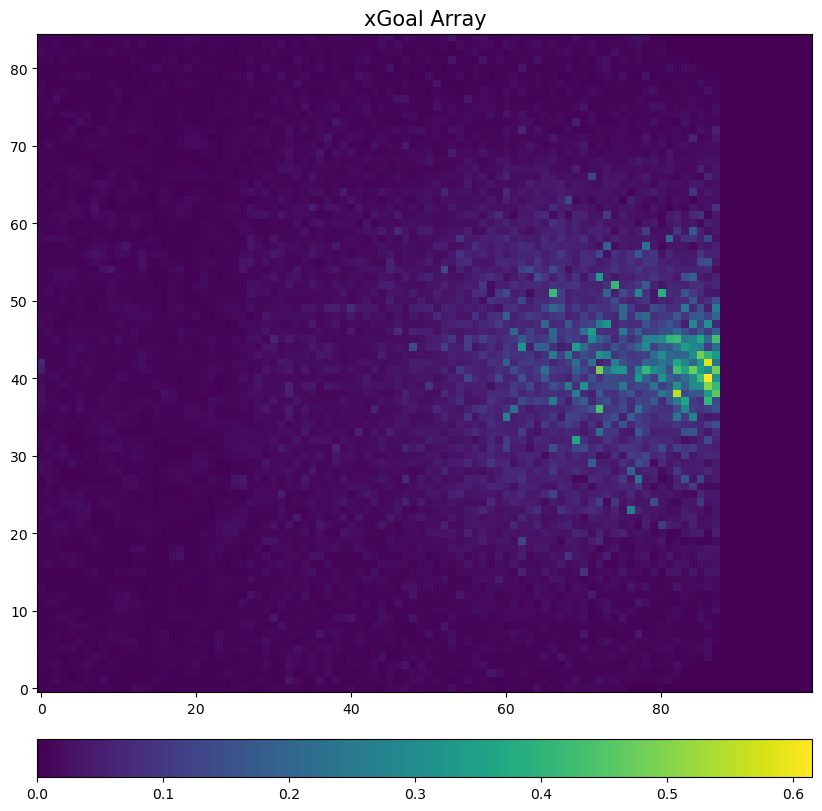

In [56]:
# XG Grid
[x,y] = np.round(np.meshgrid(np.linspace(0,100,100),np.linspace(-42.5,42.5,85)))
xgoals = griddata((shot_data['xCordAdjusted'],shot_data['yCordAdjusted']),shot_data['xGoal'],(x,y),method='cubic',fill_value=0)
xgoals = np.where(xgoals < 0,0,xgoals)

fig = plt.figure(figsize=(10,12), facecolor='w', edgecolor='k')
plt.imshow(xgoals,origin = 'lower')
plt.colorbar(orientation = 'horizontal', pad = 0.05)
plt.title('xGoal Array',fontdict={'fontsize': 15})
plt.show()

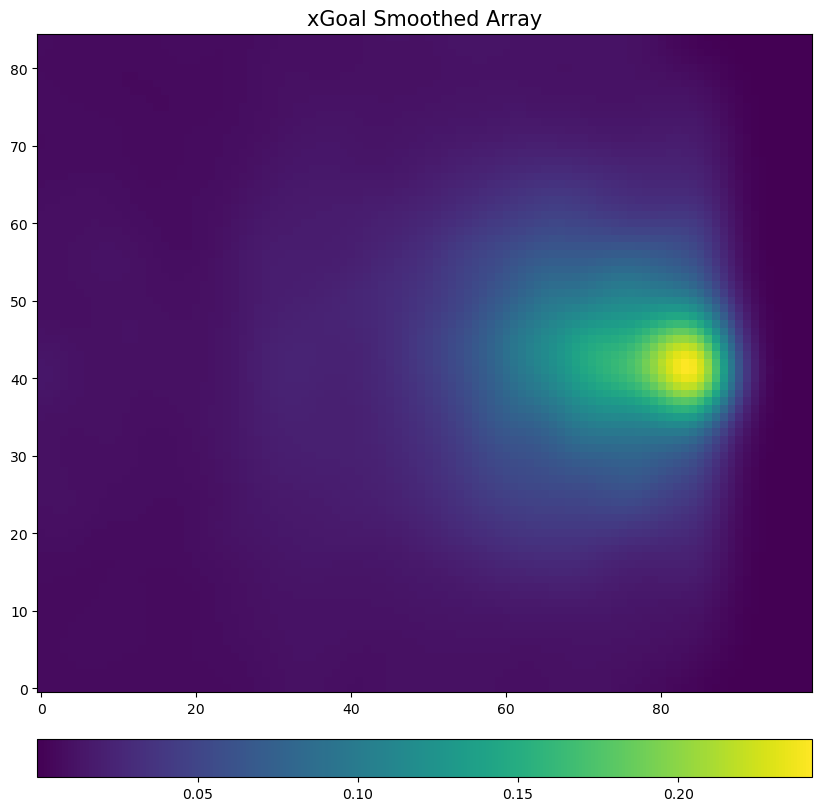

In [57]:
# Gaussian Smoothed XG Grid
xgoals_smooth = gaussian_filter(xgoals,sigma = 3)

fig = plt.figure(figsize=(10,12), facecolor='w', edgecolor='k')
plt.imshow(xgoals_smooth,origin = 'lower')
plt.colorbar(orientation = 'horizontal', pad = 0.05)
plt.title('xGoal Smoothed Array',fontdict={'fontsize': 15})
plt.show()

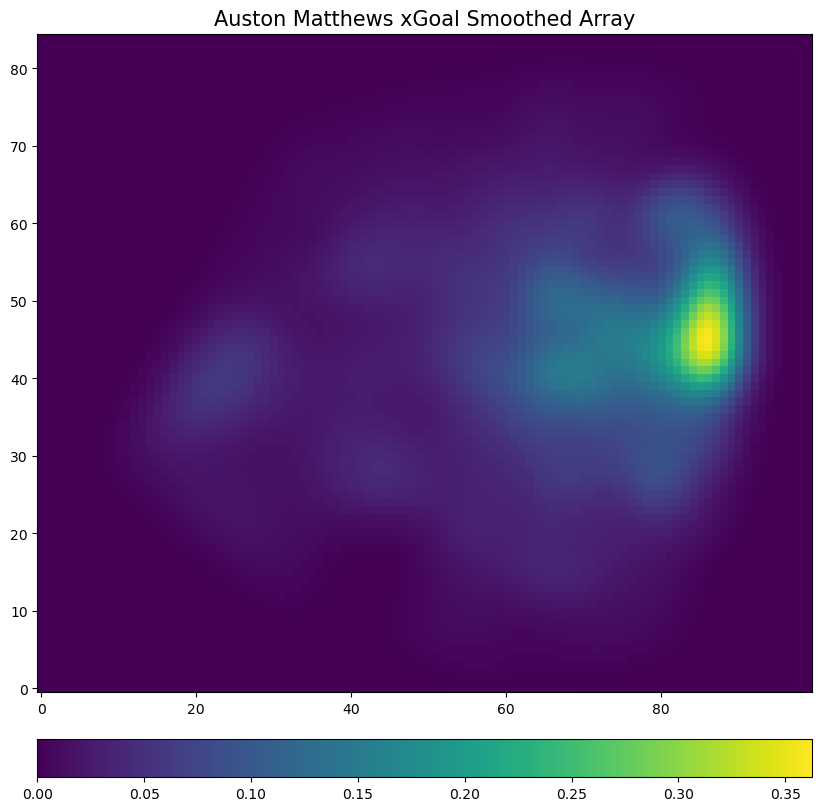

In [58]:
# TODO: Frontend with dynamic player name selection
player_name = 'Auston Matthews'
player_shots = shot_data[shot_data['shooterName'] == player_name]

[x,y] = np.round(np.meshgrid(np.linspace(0,100,100),np.linspace(-42.5,42.5,85)))
xgoals_player = griddata((player_shots['xCordAdjusted'],player_shots['yCordAdjusted']),player_shots['xGoal'],(x,y),method='cubic',fill_value=0)
xgoals_player = np.where(xgoals_player < 0,0,xgoals_player)

player_shots_smooth = gaussian_filter(xgoals_player,sigma = 3)

fig = plt.figure(figsize=(10,12), facecolor='w', edgecolor='k')
plt.imshow(player_shots_smooth,origin = 'lower')
plt.colorbar(orientation = 'horizontal', pad = 0.05)
plt.title(player_name + ' xGoal Smoothed Array',fontdict={'fontsize': 15})
plt.show()

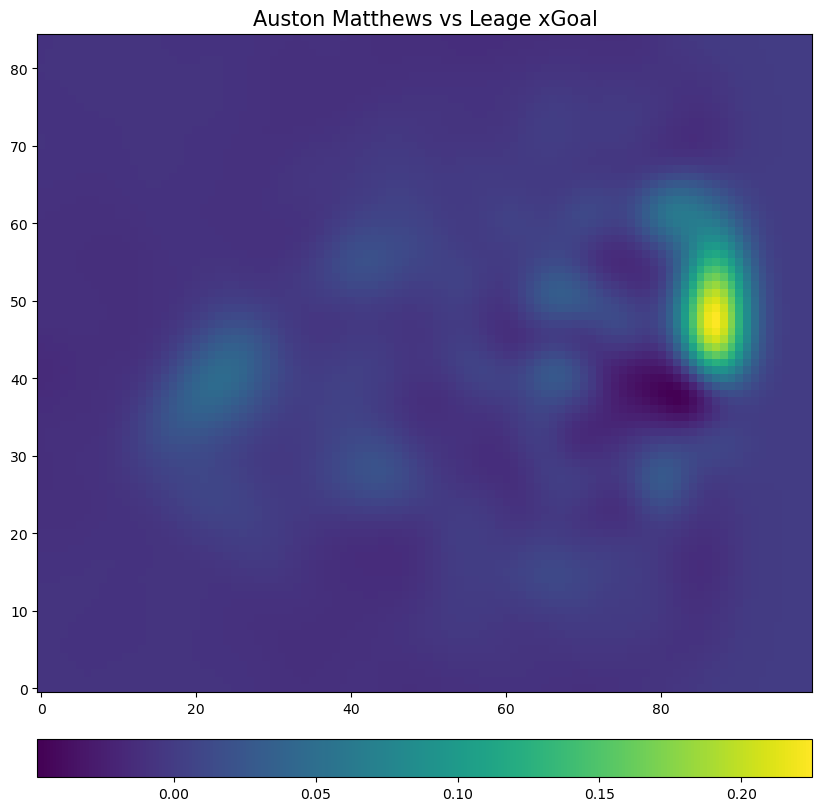

In [59]:
# Selected player vs league XG
difference = player_shots_smooth - xgoals_smooth

fig = plt.figure(figsize=(10,12), facecolor='w', edgecolor='k')
plt.imshow(difference,origin = 'lower')
plt.colorbar(orientation = 'horizontal', pad = 0.05)
plt.title(player_name + ' vs Leage xGoal',fontdict={'fontsize': 15})
plt.show()

In [ ]:
# TODO: Find way to plot NHL Rink and then overlay plot above data onto it